In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from copy import deepcopy
import sys
sys.path.append('../src')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
import mat4py
import data
import pickle as pkl
from viz import *
import viz
import trend_filtering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
df = data.get_data(use_processed=True) # all_data=True
df = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots
outcome = 'y_consec_thresh'

# load dynamin tracks

In [13]:
df = pd.read_pickle('../data/tracks/tracks_clath_aux_dynamin.pkl')

In [17]:
df.shape

(259739, 24)

In [19]:
df = df[df.catIdx.isin([1, 2])]

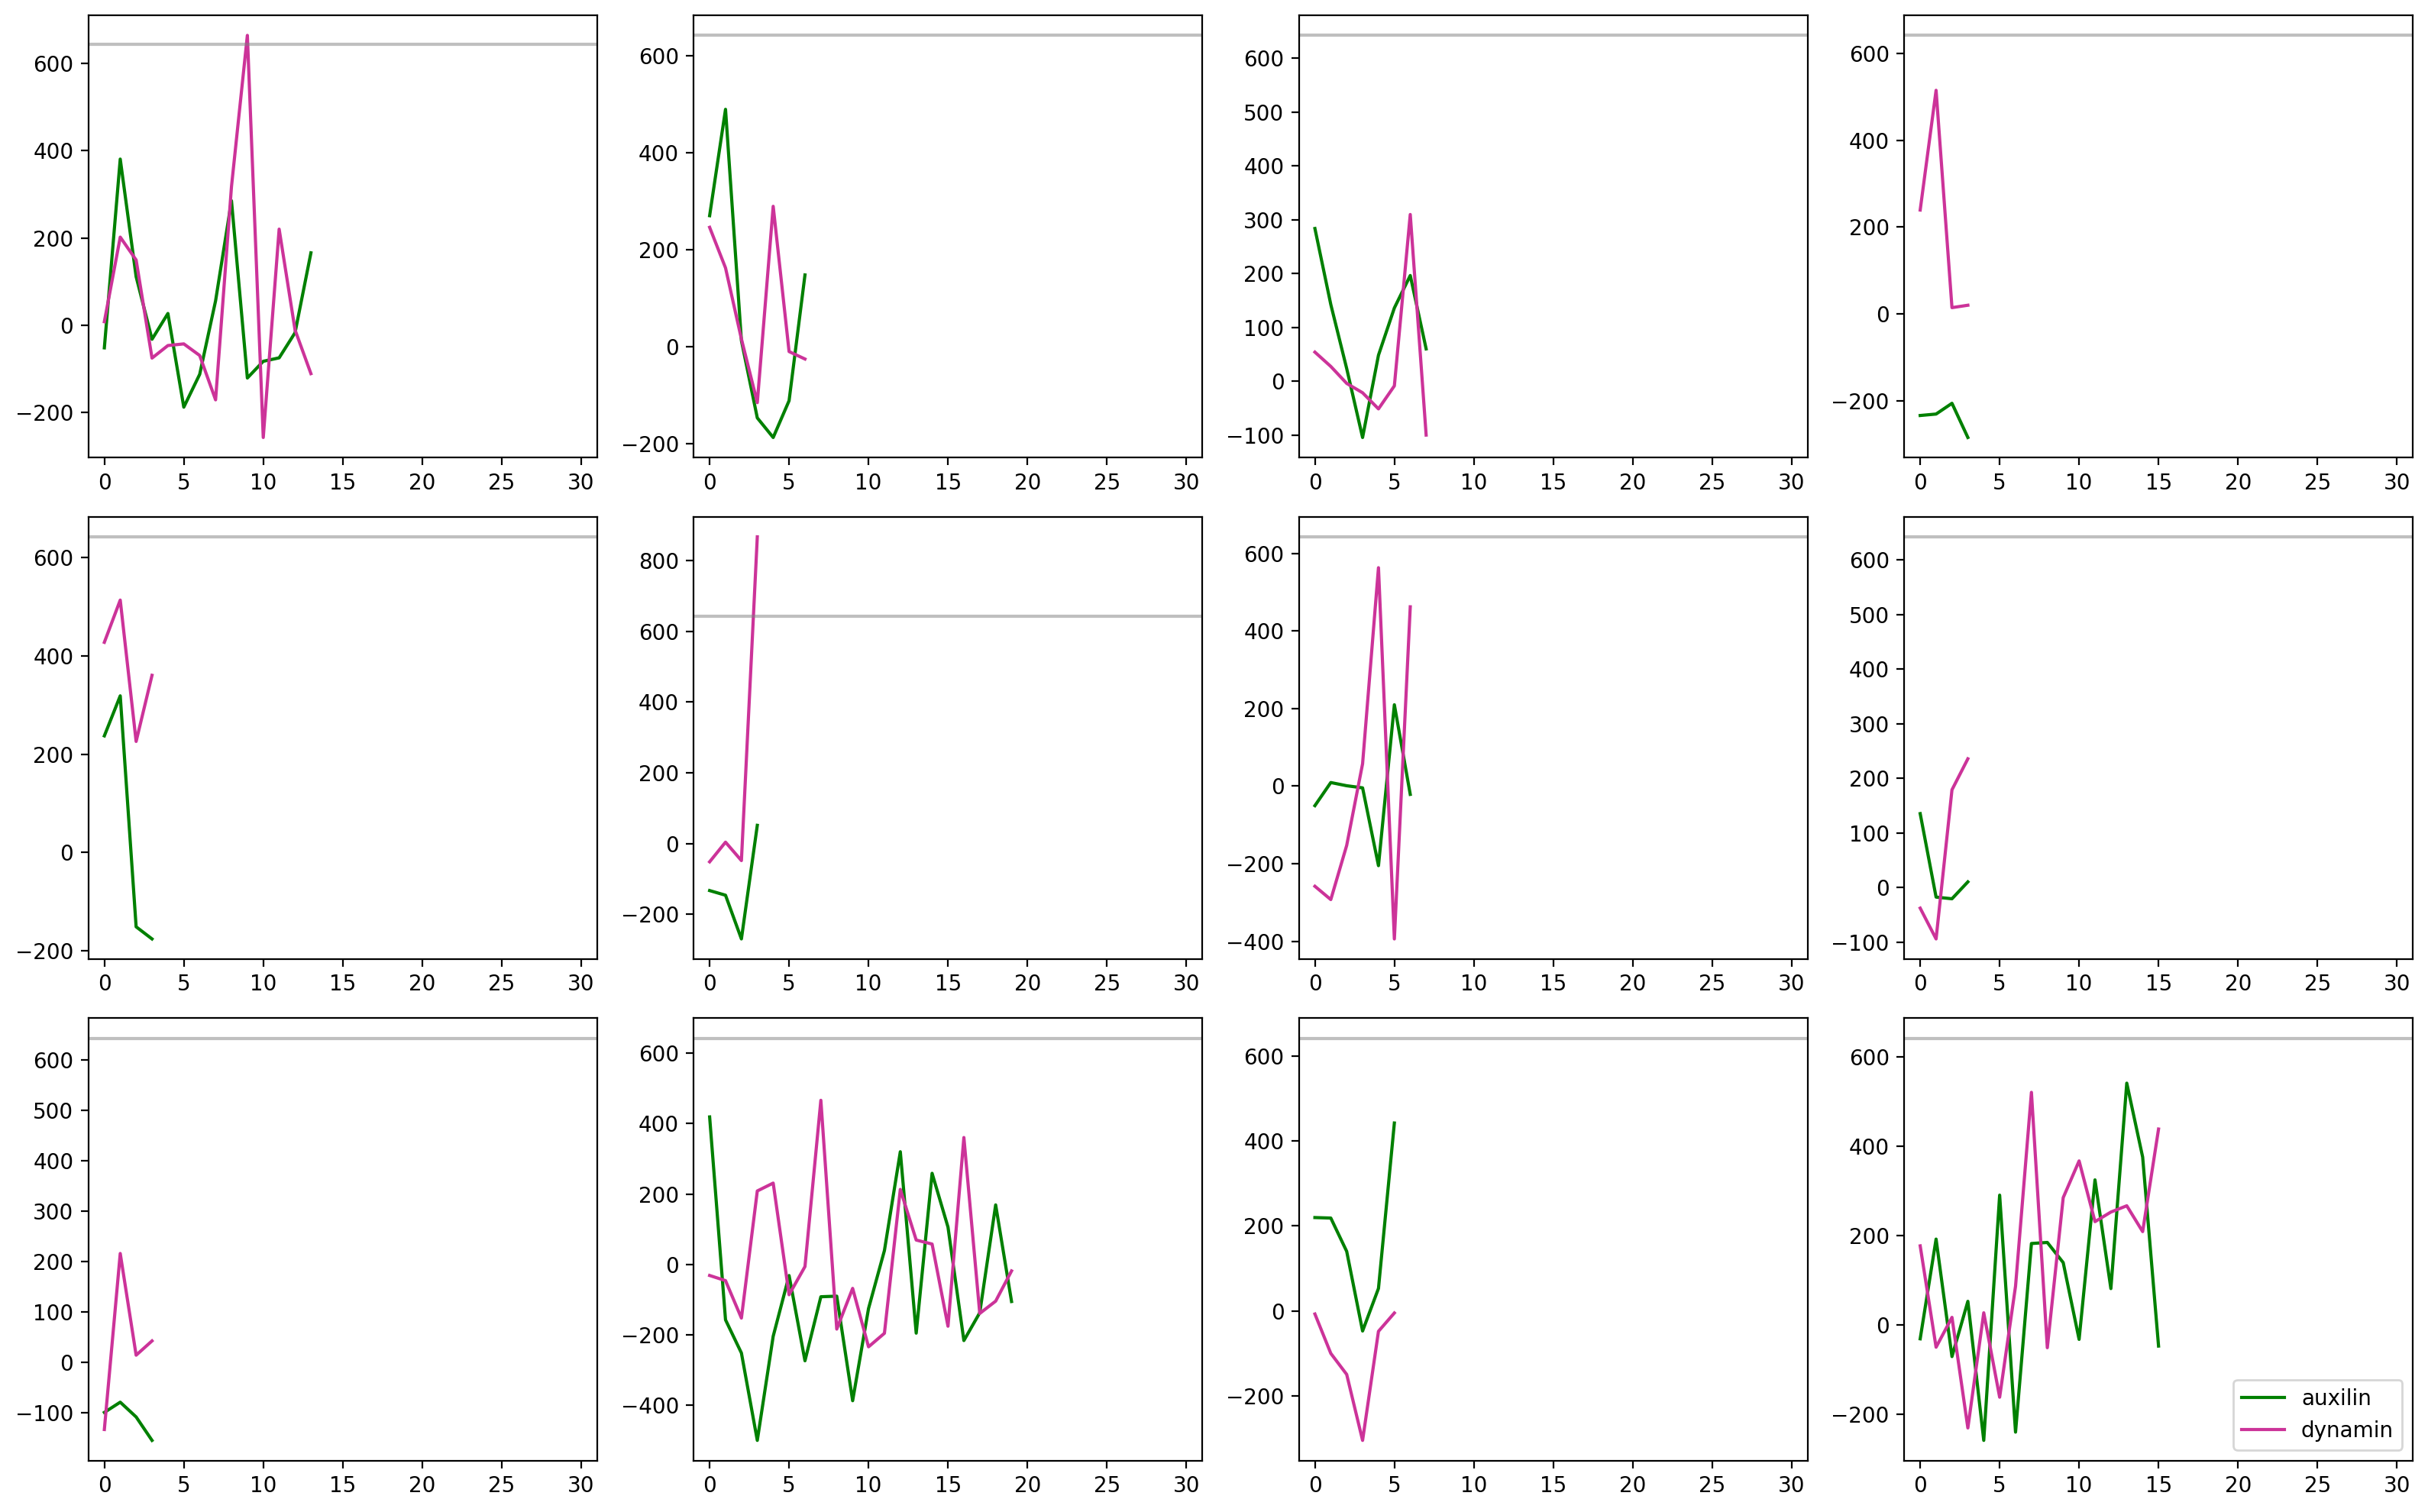

In [21]:
R, C = 3, 4
plt.figure(figsize=(16, 10), dpi=200)
lifetime_max = np.max(df.lifetime.values[:R * C])
df = df.iloc[range(R * C)]
for i in range(R * C):
    if i < df.shape[0]:
        ax = plt.subplot(R, C, i + 1)
        row = df.iloc[i]
#         plt.plot(row.X, color=cr, label='clathrin')
        plt.plot(row.Y, color='green', label='auxilin')
        plt.plot(row.Z, color=cp, label='dynamin')
        plt.axhline(642.3754691658837, color='gray', alpha=0.5)
        plt.xlim([-1, lifetime_max + 1])
#         ax.spines()
#         plt.ylim([-10, 1e4 + 1])
#     plt.axi('off')
#         plt.yscale('log')
plt.legend()
plt.tight_layout()

In [9]:
df.isna().sum()

lifetime                       0
cell_num                       0
catIdx                         0
t                              0
mean_total_displacement        0
mean_square_displacement      83
x_pos_seq                      0
y_pos_seq                      0
x_pos                       7386
y_pos                       7386
X_pvals                        0
X_extended                     0
X                              0
X_starts                       0
X_ends                         0
Y_pvals                        0
Y                              0
Y_starts                       0
Y_ends                         0
Z_pvals                        0
Z                              0
Z_starts                       0
Z_ends                         0
lifetime_extended              0
dtype: int64

In [10]:
df.shape

(259739, 24)